# Pandas
"*pandas* is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." - **https://pandas.pydata.org/**

*pandas* provide a number of useful functions for importing and analyzing data. It provides flexible data structures and operations to easily manipulate the data. *pandas* require *NumPy*.

This tutorial demonstrates use pandas to create and manipulate data structures and reading data from csv or txt files.

To use *pandas* we must first load it into our workspace using the following statement
```
import pandas as pd
```

In [1]:
# Import the `pandas` library as `pd`
import pandas as pd
#print version of pandas
pd.__version__


'0.23.0'

## Series
A *series* is a data structure which can hold a number of objects. It's like a one dimentional array.

In [2]:
#create series with pandas
ser1 = pd.Series([1, 2, 3])
print(ser1)
serA = pd.Series(['a', 'b', 'c'])
print(serA)

ser1A = pd.Series(['a', 'b', 'c',22.0])
print(ser1A)
print(ser1A[1])
print(ser1A[3]*2)

print(ser1A.index)
print(ser1A.values)

#series from dict
dict1 = {'a' : 2, 'b' : 1, 'c' : 3}
serD=pd.Series(dict1)
print(serD)
print(serD[0])
print(serD['c'])

print(serD.index)
print(serD.values)

#define your own index
cars = ['NSX', 'R8', 'chiron', '488 GTB']
mpg = [22, 22, 14, 22]
serCars = pd.Series(mpg, index=cars)
print(serCars)
print(serCars[['NSX','chiron']])

0    1
1    2
2    3
dtype: int64
0    a
1    b
2    c
dtype: object
0     a
1     b
2     c
3    22
dtype: object
b
44.0
RangeIndex(start=0, stop=4, step=1)
['a' 'b' 'c' 22.0]
a    2
b    1
c    3
dtype: int64
2
3
Index(['a', 'b', 'c'], dtype='object')
[2 1 3]
NSX        22
R8         22
chiron     14
488 GTB    22
dtype: int64
NSX       22
chiron    14
dtype: int64


## Dataframe
A *dataframe* can hold tabular data with rows and columns. It is logically same as an excel sheet. Each column in a data frame is a series.

In [3]:
#data frame from dict example
d = {'Col1' : pd. Series ([1. , 2., 3.] ,index =[ '1', 'b', 'c']) , 'Col2' : pd. Series ([2. , 9., 4.] ,index =[ 'a', 'b', 'c'])}
df1 = pd. DataFrame (d)
print(df1)

#data frame from series
df2=pd.concat([serA,ser1A], axis=1)
print(df2)

#using lists
states=['AZ','CA','IA','KS','NY']
statesFull=['Arizona','California','Iowa','Kansas','New York']
dfStates=pd. DataFrame(list(zip(states,statesFull)))
print(dfStates)
#change column names
print("After changing col names")
dfStates.columns = ['Abb', 'Name']
print(dfStates)
#see dimentions
print(dfStates.shape)



   Col1  Col2
1   1.0   NaN
a   NaN   2.0
b   2.0   9.0
c   3.0   4.0
     0   1
0    a   a
1    b   b
2    c   c
3  NaN  22
    0           1
0  AZ     Arizona
1  CA  California
2  IA        Iowa
3  KS      Kansas
4  NY    New York
After changing col names
  Abb        Name
0  AZ     Arizona
1  CA  California
2  IA        Iowa
3  KS      Kansas
4  NY    New York
(5, 2)


## Dataframe indexing
With pandas dataframes, **[]** operator selects columns by name. The method *iloc* is used to select rows by the integer index.

In [4]:
#see column names
print(dfStates.columns)

# select Name column
print(dfStates['Name'])

#select 1st column
print(dfStates[dfStates.columns[0]])

#print first n rows
n=3
print(dfStates.head(n))
#print last n rows
print(dfStates.tail(n))

#print 2nd row
print(dfStates.iloc[[1]])
#or use splice operator
print(dfStates[1:2])
    

Index(['Abb', 'Name'], dtype='object')
0       Arizona
1    California
2          Iowa
3        Kansas
4      New York
Name: Name, dtype: object
0    AZ
1    CA
2    IA
3    KS
4    NY
Name: Abb, dtype: object
  Abb        Name
0  AZ     Arizona
1  CA  California
2  IA        Iowa
  Abb      Name
2  IA      Iowa
3  KS    Kansas
4  NY  New York
  Abb        Name
1  CA  California
  Abb        Name
1  CA  California


## Import data
Import .csv data from storage into python workspace using pandas. Then we use pandas functions and tools to explore the dataset.

In [5]:
df = pd.read_csv("data/iris.data.csv")
#df=pd.read_csv("https://raw.githubusercontent.com/urmi-21/python3-dataScience18/master/data/iris.data.csv")
#see df dimentions
print(df.shape)
#see datatypes
print(df.dtypes)
#print first 5 rows
print(df.head(5))





(150, 5)
sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object
   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


Find summary statistics of the data

In [6]:
#get data summary
print("Data summary")
print (df.describe())

#print unique class values
df['class'].unique()

#get mean sepallength
print("mean fisrt col "+str(df['sepallength'].mean()))
#refers to first column
print("mean fisrt col "+str(df[df.columns[0]].mean()))
#find mean of sepallength by class
print("mean of sepallength by class: "+str(df.groupby('class')['sepallength'].mean()))
#find mean for each class
print("means by class"+str(df.groupby('class').mean()))




Data summary
       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000
mean fisrt col 5.843333333333335
mean fisrt col 5.843333333333335
mean of sepallength by class: class
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepallength, dtype: float64
means by class                 sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa            5.006       3.418        1.464       0.244
Iris-versicolor        5.936       2.770        4.260       

Manipulate data using *apply*, *applymap* and *map* functions.

1. *apply* method is used for applying a function on 1D arrays to each column or row.
2. *applymap* method is used for applying element-wise operations on dataframes.
3. *map* map method for applying an element-wise functions on series.

In [7]:
#apply function
import math
def logX(x):
    return math.log(x)
#create a new column, logsepallength which is log of sepallength column
df['logsepallength'] = df['sepallength'].apply(logX)
#create a new column, logpetallength which is log of petallength column using lambda function
df['logpetallength'] = df['petallength'].apply(lambda x: math.log(x))
print(df[df.columns[:-3]].apply(lambda x: x.max() - x.min()))
print(df[df.columns[:-3]].apply(lambda x: x.max() - x.min(), axis=1))
print(df.head(5))
#log whole dataset and save as adfLog
df2=df.drop('class', axis=1).apply(lambda x: x+10 )
df2['class']=df['class']
dfLog=df.drop('logsepallength', axis=1).drop('logpetallength', axis=1).drop('class', axis=1).applymap(lambda x: math.log(x))
#copyback class columns which was dropped before
dfLog['class']=df['class']
print(dfLog.head(5))

#example of map to sqrt sepallength
df['logsepallength'].map(lambda x: math.sqrt(x)).head(3)


sepallength    3.6
sepalwidth     2.4
petallength    5.9
petalwidth     2.4
dtype: float64
0      4.9
1      4.7
2      4.5
3      4.4
4      4.8
5      5.0
6      4.3
7      4.8
8      4.2
9      4.8
10     5.2
11     4.6
12     4.7
13     4.2
14     5.6
15     5.3
16     5.0
17     4.8
18     5.4
19     4.8
20     5.2
21     4.7
22     4.4
23     4.6
24     4.6
25     4.8
26     4.6
27     5.0
28     5.0
29     4.5
      ... 
120    4.6
121    3.6
122    5.7
123    4.5
124    4.6
125    5.4
126    4.4
127    4.3
128    4.3
129    5.6
130    5.5
131    5.9
132    4.2
133    4.8
134    4.7
135    5.4
136    3.9
137    4.6
138    4.2
139    4.8
140    4.3
141    4.6
142    3.9
143    4.5
144    4.2
145    4.4
146    4.4
147    4.5
148    3.9
149    4.1
Length: 150, dtype: float64
   sepallength  sepalwidth  petallength  petalwidth        class  \
0          5.1         3.5          1.4         0.2  Iris-setosa   
1          4.9         3.0          1.4         0.2  Iris-setosa   
2     

0    1.276417
1    1.260649
2    1.244011
Name: logsepallength, dtype: float64

#### Find the correlations between the columns.

In [8]:
corrMat=dfLog[dfLog.columns[:-1]].corr()
print(corrMat)

#find highest and lowest corr values 
corrMat['sepallength'].sort_values(ascending=False)

             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.103746     0.841301    0.799921
sepalwidth     -0.103746    1.000000    -0.465218   -0.434430
petallength     0.841301   -0.465218     1.000000    0.962736
petalwidth      0.799921   -0.434430     0.962736    1.000000


sepallength    1.000000
petallength    0.841301
petalwidth     0.799921
sepalwidth    -0.103746
Name: sepallength, dtype: float64

#### Group data by class using *groupby*
Can use *groupby* to split dataframe by columns or rows. General syntax is

```
df.groupby('colname')
df.groupby(['colname1','colname2'])
df.groupby(key,axis=1)
```

In [9]:
import numpy as np
#groupby class
grouped=dfLog.groupby('class')
print(grouped)
#see groups
print(grouped.groups)

#print group mnames
print ("Group names:",grouped.groups.keys())

#get group by key
print (grouped.get_group('Iris-versicolor'))



{'Iris-setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64'), 'Iris-versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
            67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
            84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64'), 'Iris-virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
            139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64')}
Group names: dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    sepallength 

#### Aggregated functions
Aggregated functions returns an aggregate value for each group. *agg* function is used to aggregating data.

In [10]:
#get mean values 
print ("Mean values",grouped.agg(np.mean))
print ("size ",grouped['sepallength'].agg(np.size))
print("Min Max",grouped.agg(['min', 'max']))


def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile
def percentile2(n):
    
    return np.percentile(x, n)
   

print("Max",grouped.agg(['min', 'max','median',percentile(50)]))
print("SumSq",grouped['sepallength'].agg([('SS',lambda x: x.sum()**2),'median']))




Mean values                  sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa         1.608205    1.222865     0.374139   -1.498512
Iris-versicolor     1.777319    1.012282     1.442930    0.270933
Iris-virginica      1.880654    1.084180     1.709426    0.696748
size  class
Iris-setosa        50.0
Iris-versicolor    50.0
Iris-virginica     50.0
Name: sepallength, dtype: float64
Min Max                 sepallength           sepalwidth           petallength  \
                        min       max        min       max         min   
class                                                                    
Iris-setosa        1.458615  1.757858   0.832909  1.481605    0.000000   
Iris-versicolor    1.589235  1.945910   0.693147  1.223775    1.098612   
Iris-virginica     1.589235  2.066863   0.788457  1.335001    1.504077   

                          petalwidth            
                      max        min  

#### Transform data within groups
We can use *transform* to define transformation of data.

In [13]:
#transform on grouped data
print (grouped.transform(lambda x: (x - x.mean()) / x.std()))
#transform on original data
print (dfLog[dfLog.columns[:-1]].transform(lambda x: (x - x.mean()) / x.std()))

     sepallength  sepalwidth  petallength  petalwidth
0       0.298382    0.264178    -0.311781   -0.261337
1      -0.269090   -1.097899    -0.311781   -0.261337
2      -0.860215   -0.527636    -0.925205   -0.261337
3      -1.165279   -0.808168     0.259304   -0.261337
4       0.017484    0.513096    -0.311781   -0.261337
5       1.109170    1.220354     1.295335    1.371685
6      -1.165279    0.008044    -0.311781    0.693920
7       0.017484    0.008044     0.259304   -0.261337
8      -1.795824   -1.397453    -0.311781   -0.261337
9      -0.269090   -0.808168     0.259304   -1.894359
10      1.109170    0.755194     0.259304   -0.261337
11     -0.561573    0.008044     0.793518   -0.261337
12     -0.561573   -1.097899    -0.311781   -1.894359
13     -2.121928   -1.097899    -2.307986   -1.894359
14      2.122811    1.444063    -1.587754   -0.261337
15      1.876110    2.286224     0.259304    1.371685
16      1.109170    1.220354    -0.925205    1.371685
17      0.298382    0.264178

## Data Visualisation
In python we can make plots using *pandas* and *seaborn* libraries.

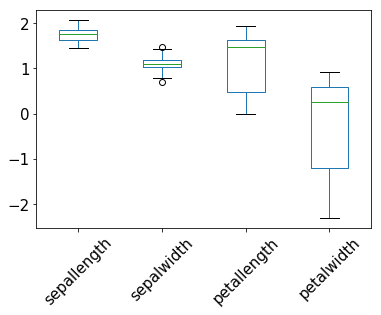

In [25]:
#plot box plot
dfLog.boxplot(grid=False, rot=45, fontsize=15)


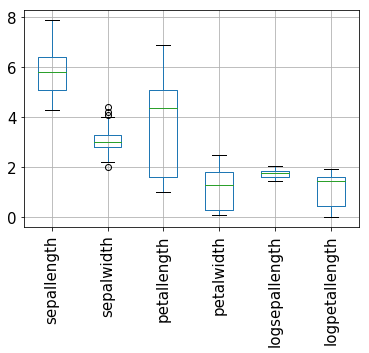

In [22]:
df.boxplot( rot=90, fontsize=15)

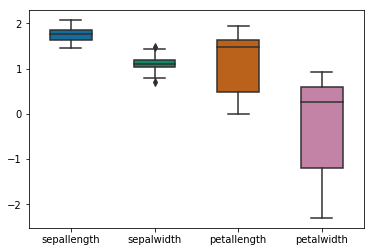

In [44]:
#using sns
sns.boxplot(data=dfLog,width=0.5,palette="colorblind")

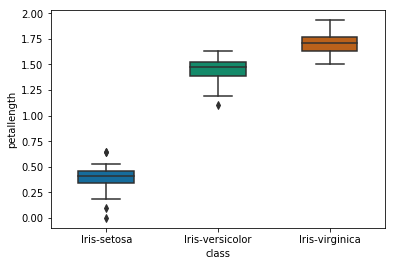

In [35]:
sns.boxplot(x='class',y="petallength",data=dfLog,width=0.5,palette="colorblind")

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


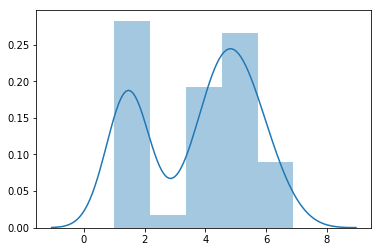

In [39]:
sns.distplot(dfLog[['petallength']])

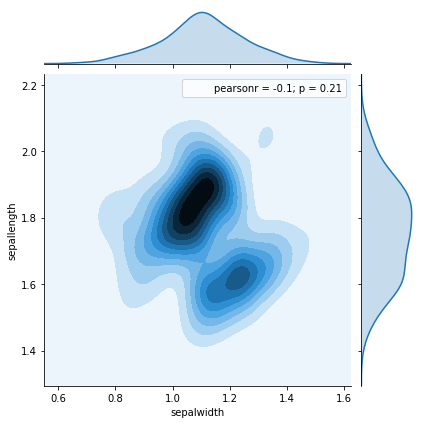

In [59]:
#joint density plot
sns.jointplot(x="sepalwidth", y="sepallength", data=dfLog, kind="kde");

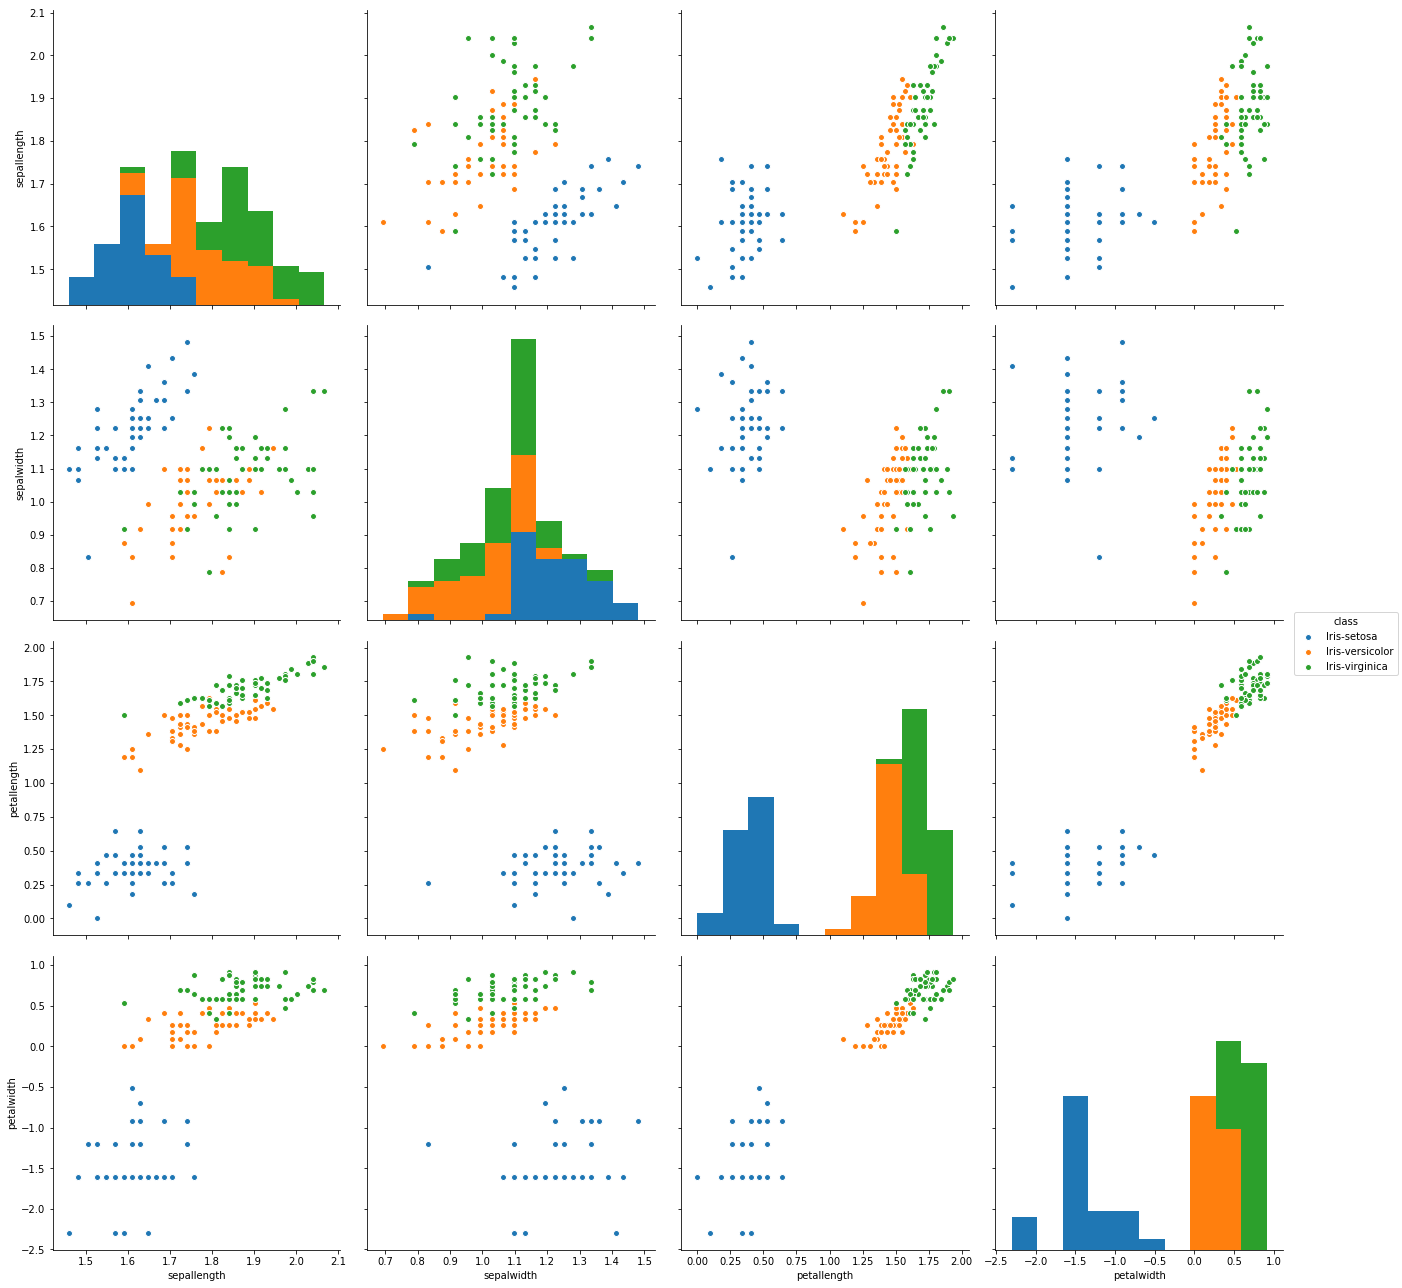

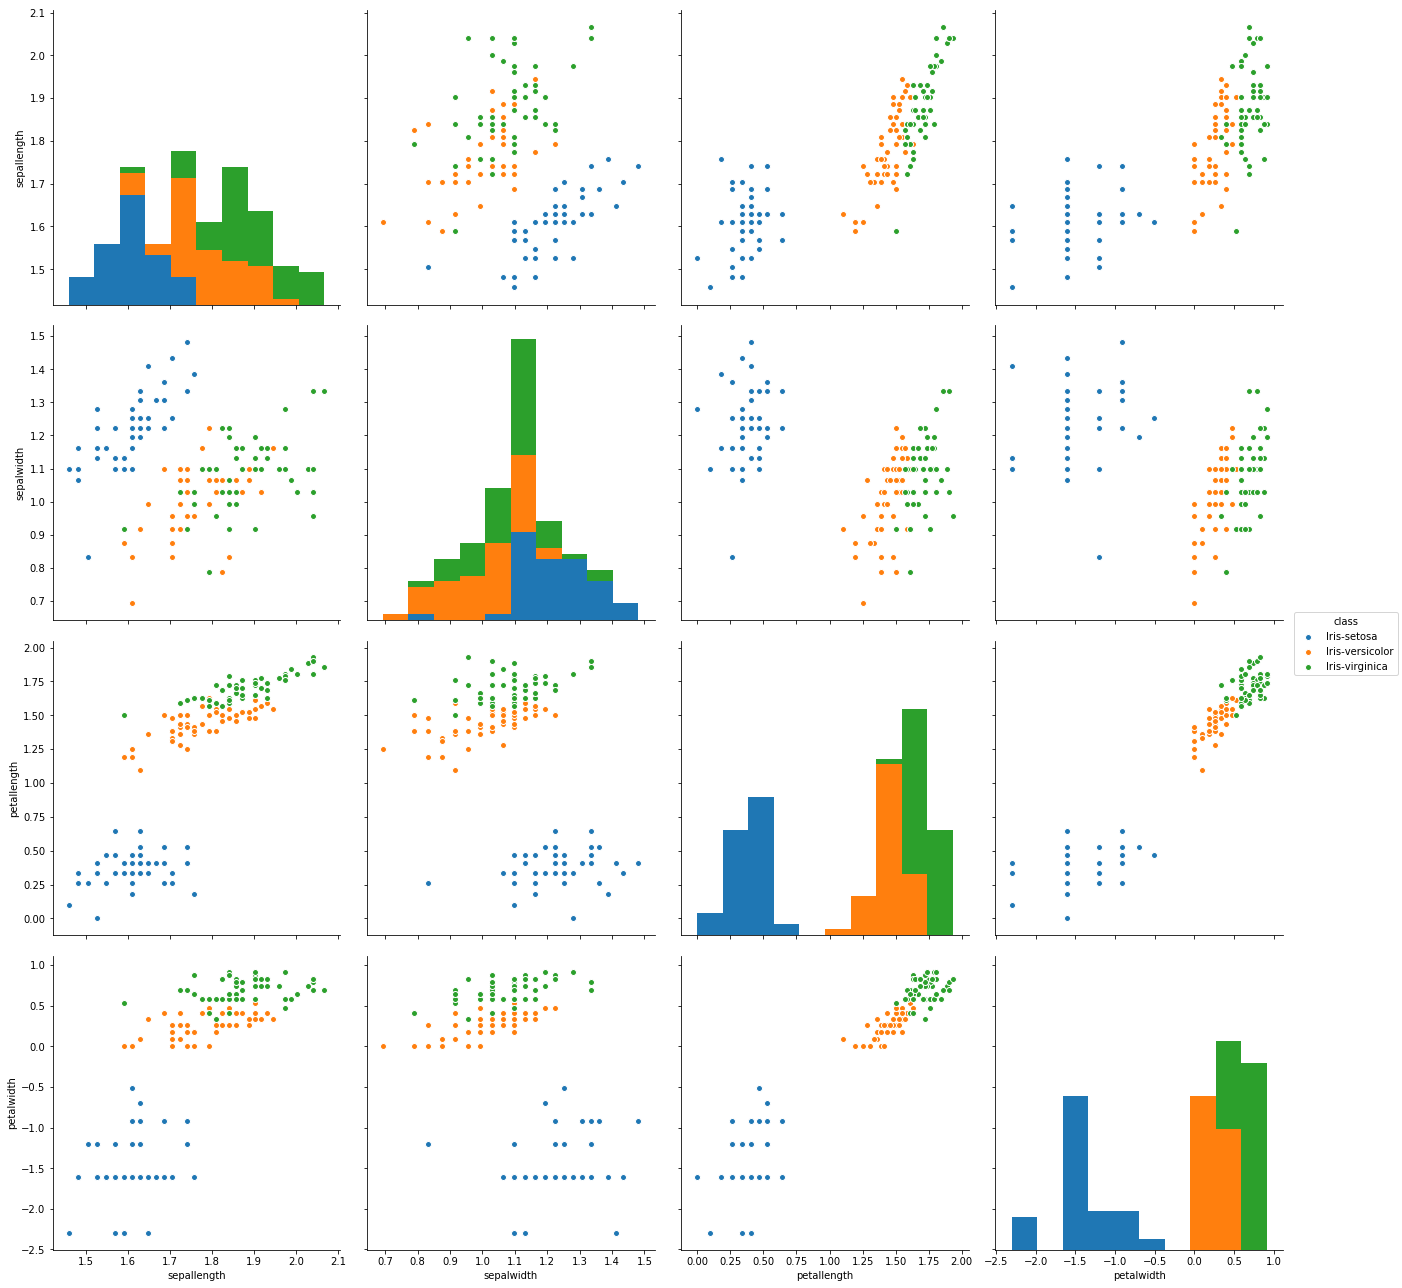

In [45]:
sns.pairplot(dfLog, size=4.5, hue="class")



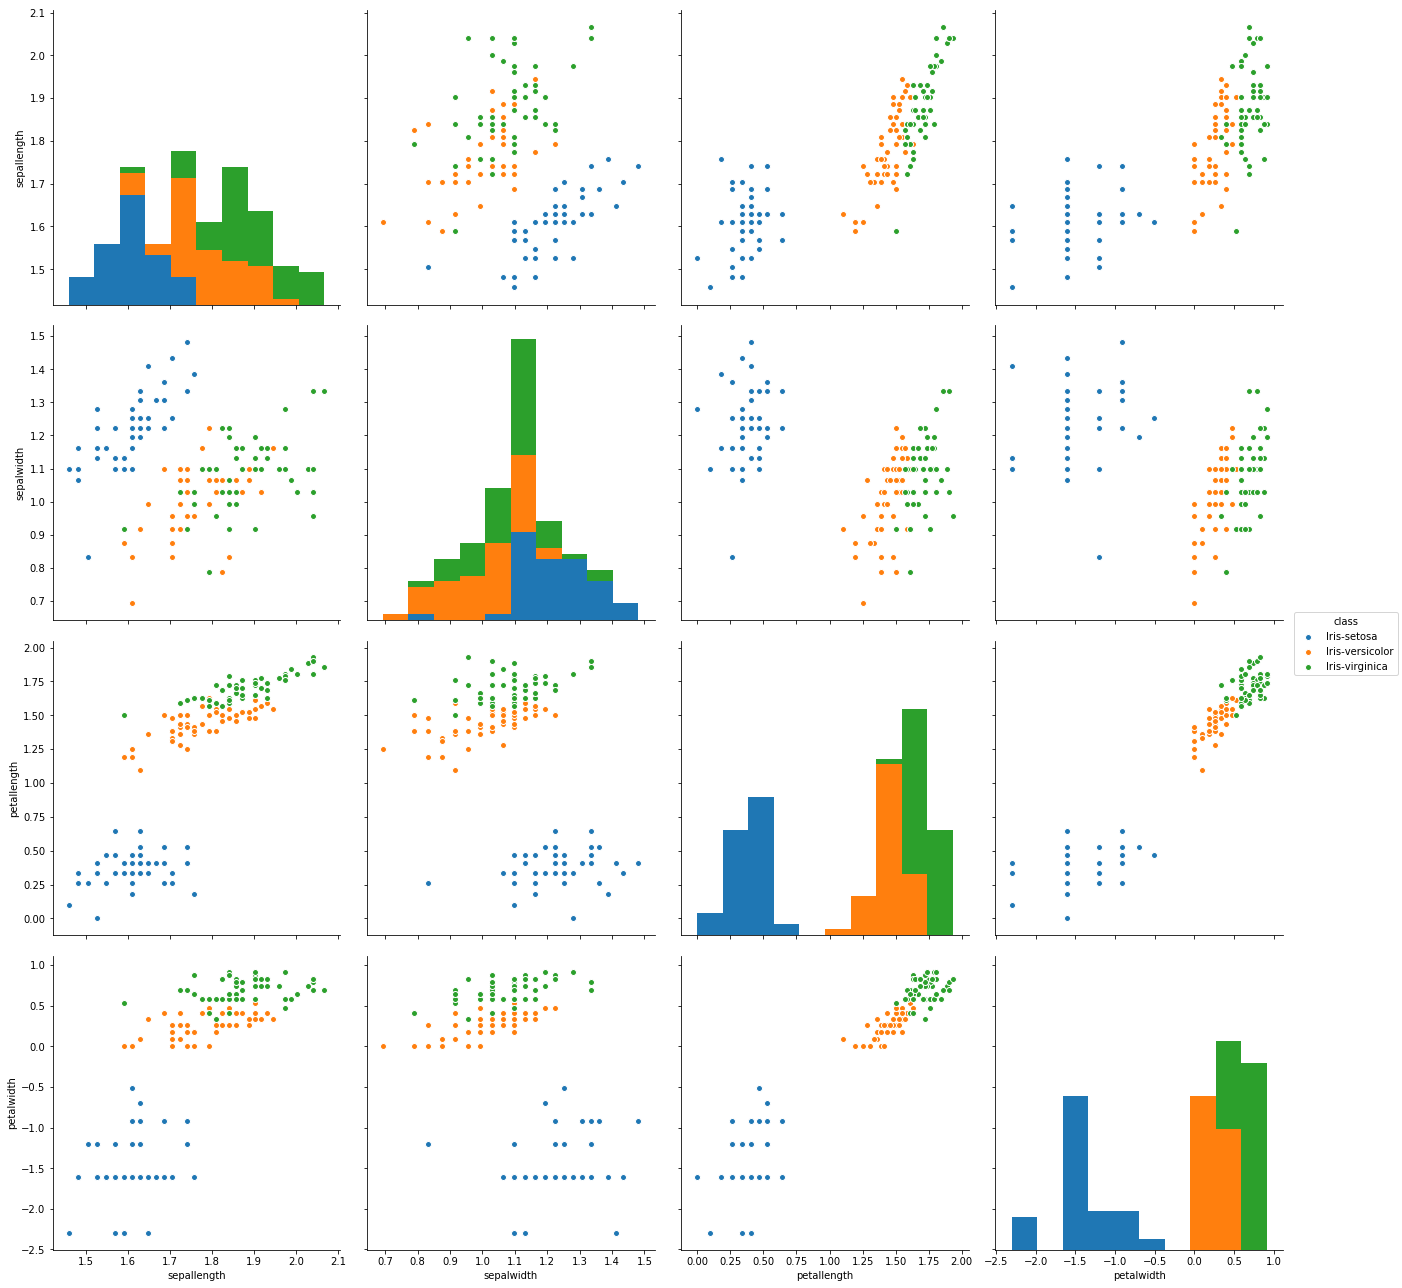

In [47]:
#save this plot to file
pl=sns.pairplot(dfLog, size=4.5, hue="class")
filename="fig1.png"
pl.savefig(fi,format='png',dpi=300)

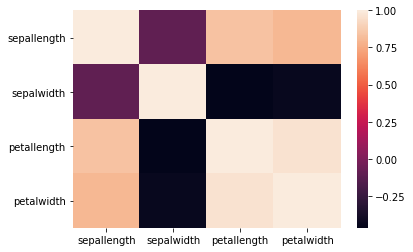

In [48]:
import seaborn as sns
#write this to show plots in line
%matplotlib inline
#plot heatmap of correlation matrix
sns.heatmap(corrMat, xticklabels=corrMat.columns, yticklabels=corrMat.columns)